In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

import scipy.stats as st

I wanted to put this example out because one of my colleague asked me a question about result table of logistic regression. Back in the day while I was watching the [video](https://www.youtube.com/watch?v=8nm0G-1uJzA), Josh Starmer said distribution of log(odds ratio) is approximately normal and gave an idea of how to simulate. I didn't end up his way of simulating, if you want that maybe you should follow the approach in the video but we actually both do the same thing. 

Let's say we have the following information:

In [2]:
cancer_gene_cb = pd.crosstab(['yes', 'no'], ['yes', 'no'], rownames=['mutated_gene'], colnames=['has_cancer'])
cancer_gene_cb.loc['yes', 'yes'] = 23
cancer_gene_cb.loc['yes', 'no'] = 117
cancer_gene_cb.loc['no', 'no'] = 210
cancer_gene_cb.loc['no', 'yes'] = 6

cancer_gene_cb

has_cancer,no,yes
mutated_gene,,
no,210,6
yes,117,23


Let's represent the information in a different way. For the ones who are not familiar, *odds* is ratio of something happening to something not happening. When there's *odds ratio*, it actually means *ratio of odds*.

In [3]:
# Given the mutated version of the gene, odds of having cancer
mutated_gene_odds = cancer_gene_cb.loc['yes', 'yes'] / cancer_gene_cb.loc['yes', 'no'] # 23 / 117

# Given the wild version of the gene, odds of having cancer
wild_gene_odds = cancer_gene_cb.loc['no', 'yes'] / cancer_gene_cb.loc['no', 'no'] # 6 / 210

odds_ratio = mutated_gene_odds / wild_gene_odds # 6.88

log_odds_ratio = round(np.log(odds_ratio), 2)
print(log_odds_ratio)

1.93


It seems like people who have the mutated gene have higher odds (i.e., 6.88 times more likely) in terms of having cancer. But I wonder if this is statistically significant. \
So, I want to do a simulation see how often would I see the *log(odds ratio)* of 1.93 under the assumption of no relationship between the two variables. If I don't see it very often, I make sense to act as if there's a difference. \

Let's go through a simulation:

In [4]:
li = [] # creating an empty bag
sample_size = 356 # our sample size

Creating 29 "cancer" written cards and putting them in a bag, representing the number of people with cancer in our sample.

In [5]:
for i in range(0, 29):
    li.append('cancer')

Creating 327 "no cancer" written cards and putting them in a bag, representing the number of people without cancer in our sample.

In [6]:
for j in range(0, 327):
    li.append('no cancer')

In [7]:
mutated_version = []
wild_version = []

There are 140 people with cancer, 216 people without cancer. Under the assumption of no relationship between the cancer and the gene variant, I'd expect no difference between odds of cancer given the mutated gene and given the wild gene. In other words, knowing the gene variant does not provide any meaningful information.

In [8]:
for i in range(10000):
    sampl_all = np.random.choice(li, size=len(li)) #  Shuffling the bag (cards)

    #  Taking 140 of them (representing the number of participants with mutated gene)
    sampl_mutated_version = sampl_all[:140].tolist()
    # and calculating the odds in favor of cancer in the mutated gene group
    mutated_version.append(sampl_mutated_version.count('cancer') / sampl_mutated_version.count('no cancer')) 

    #  Taking rest of the cards (representing the number of participants in the non-mutated gene group)
    sampl_wild_version = sampl_all[140:].tolist() 
    #  and calculating the odds in favor of cancer in the non-mutated gene group
    wild_version.append(sampl_wild_version.count('cancer') / sampl_wild_version.count('no cancer'))

In [9]:
mutated_version_nd = np.array(mutated_version)
wild_version_nd = np.array(wild_version)

In [10]:
odds_ratio = mutated_version_nd / wild_version_nd #  Calculating odds ratio

In [11]:
log_odds_ratio = np.log(odds_ratio) #  Calculating log(odds ratio)

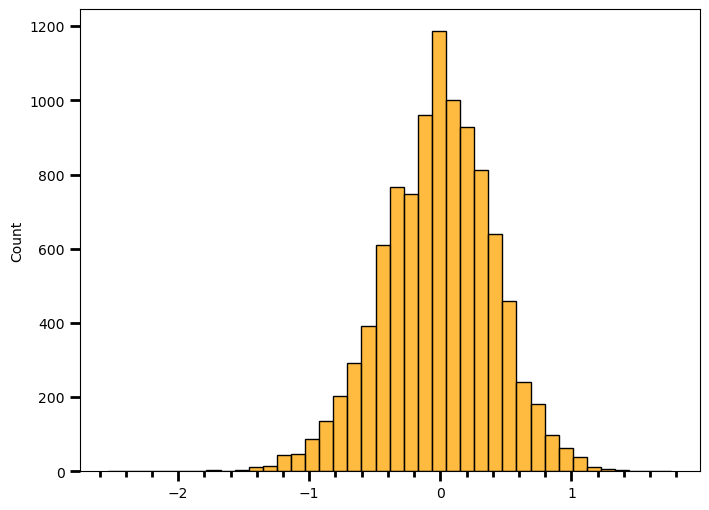

In [12]:
#  Plotting the distribution of log(odds ratio)

fig = plt.figure(figsize=(8, 6))
g = sns.histplot(data=log_odds_ratio, bins=40, color="orange", edgecolor="black")

g.xaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

plt.show(g)

In [13]:
print(round(np.mean(log_odds_ratio), 2))
print(round(np.std(log_odds_ratio), 2))

-0.02
0.42


Apparently it can be approximated by normal distribution. It is centered around zero with standard deviation of 0.42. Let's see how often I would observe a result as or more extreme as 1.93.

In [14]:
len([val for val in log_odds_ratio if abs(val) > 1.93]) / len(log_odds_ratio)

0.0002

Since I simulate the whole thing under the assumption of no difference between groups, selected alpha level should correspond to my long-term type I error rate. If alpha = 0.05, I should observe 5% values to fall more than 2 standard deviation (approximately). Let's check if it's the case.

In [15]:
len([val for val in log_odds_ratio if abs(val) > 2 * np.std(log_odds_ratio)]) / len(log_odds_ratio)

0.0479

I really tried to simplify things here, to not make a huge mess out of this but another approach would be to fit a theoretical distribution, such as normal distribution, since that's what the Wald Test does and then step to integrating over the area that fall larger than absolute value of 1.93 . It also requires a few extra steps, such as calculating *estimated* standard deviation. For the ones who would like to play with the idea, here's the [video link](https://youtu.be/8nm0G-1uJzA?si=9BhhXKQ9kPMZ2c7c) again.

Have a nice weekend.